For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [634]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [635]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [636]:
# Import your implementation
from linear_regression import LinearRegression
from logistic_regression import LogisticRegression

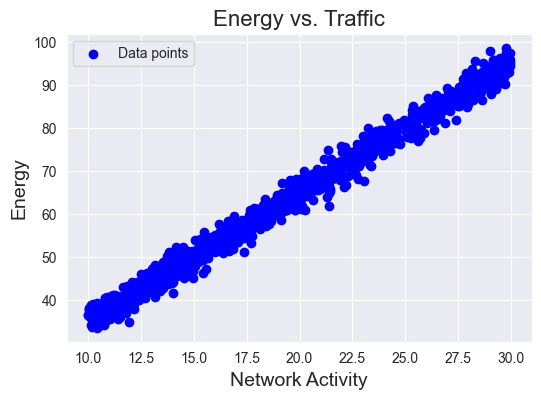

In [637]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

# Mission 1
### 1. **Implementation**:
*See linear_regression.py*

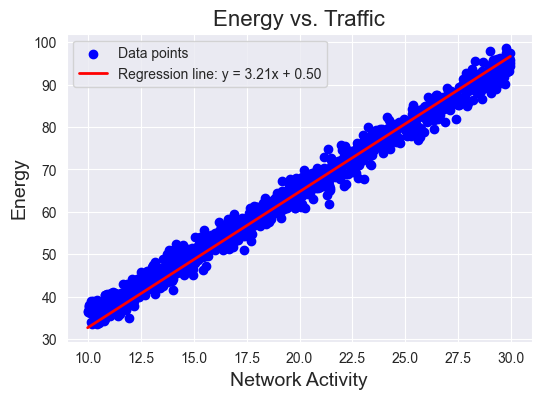

In [638]:
lr = LinearRegression(learning_rate=0.001, epochs=500)

X = data[['Net_Activity']]
y = data['Energy']

# Assumption: Since discussion task b) require you to analyze prediction error distribution, I assume you have to split the data even though it isn't explicitly mentioned, unlike Mission 2.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = lr.predict(X_test)

x_line = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_line = np.linspace(y_pred.min(), y_pred.max()).reshape(-1, 1)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, c='blue', label='Data points')
plt.plot(x_line, y_line, c='red', linewidth=2,
         label=f"Regression line: y = {float(lr.weights[0]):.2f}x + {float(lr.bias):.2f}"
)
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

### 2. **Discussion**

**a)**

The fitted curve can be visualized in the plot from the code above this cell.
The energy consumption formula from the linear regression model is:

$$
y = 3.21x + 0.50
$$

Taking the derivative of $y$ with respect to $x$:

$$
\frac{dy}{dx} = 3.21
$$

This gives us the slope of the curve, which in this context can be interpreted as:
For every unit increase in Network Activity, SkyNet consumes 3.21 units of Energy.

0.16182493394095845


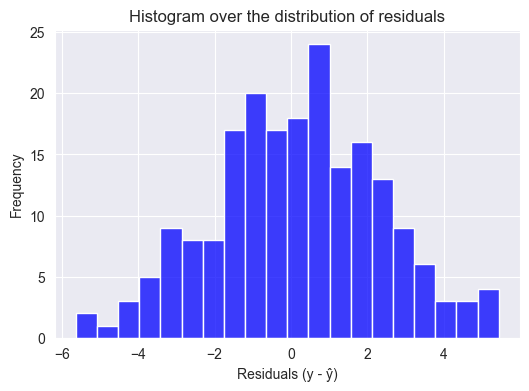

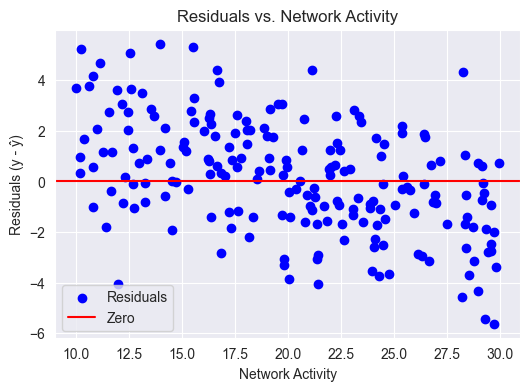

In [639]:
residuals = y_test-y_pred
print(np.mean(residuals))

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=20, color="blue")
plt.title("Histogram over the distribution of residuals")
plt.xlabel("Residuals (y - ŷ)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(X_test, residuals, color="blue", label="Residuals")
plt.axhline(y=0, color="red", label="Zero")
plt.xlabel("Network Activity")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Residuals vs. Network Activity")
plt.grid(True)
plt.legend()
plt.show()

**b)**
Looking at the graph, the prediction errors appear to be relatively small, but it seems like a pattern exists: From the start it underpredicts before it later overpredicts in the end. Since the  distribution resembles a bell curve (normal distribution), we can assume that the linear regression model is performing reasonably well.

An unbiased estimator is to be unbiased if its expected value is equal to the true value of the parameter. In other words, an estimator is unbiased it manages to produce parameter estimates that are on avarage correct.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [640]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

# Split the train and test with features and target
train = train.copy().drop(columns=['split'])
test = test.copy().drop(columns=['split'])

X_train = train[['x0', 'x1']].to_numpy()
y_train = train['y'].to_numpy()

X_test = test[['x0', 'x1']].to_numpy()
y_test = test['y'].to_numpy()

# Mission 2
### 1. Implementation
*See logistic_regression.py*

### 2. Performance (*Feature engineering*)

Result with logistic regression without feature engineering:

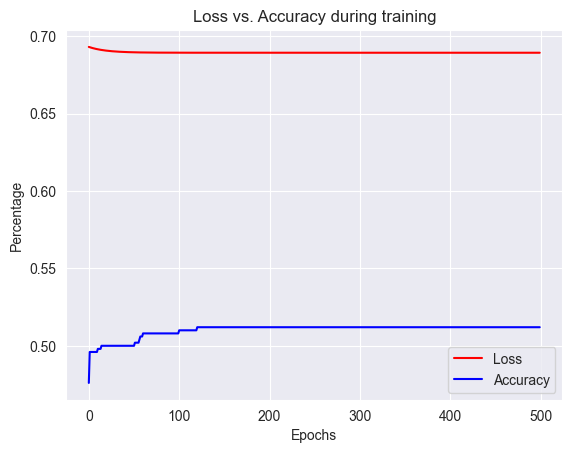

Accuracy: 0.49


In [641]:
lgr = LogisticRegression(learning_rate=0.1, epochs=500)
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

# Plot the loss-accuracy plot
plt.plot([i for i in range(lgr.epochs)], lgr.losses, c='red', label="Loss")
plt.plot([i for i in range(lgr.epochs)], lgr.train_accuracies, c='blue', label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.title("Loss vs. Accuracy during training")
plt.legend()
plt.show()

print(f"Accuracy: {lgr.accuracy(y_test, y_pred)}") # Result is not good engough

Since the result above is not at least 0.88 in accuracy, we can continue to engineer new features to the dataset. To do so, we can plot a scatterplot to check for linearity or other relations

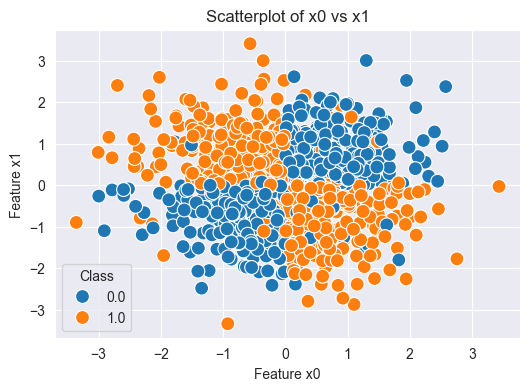

In [642]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='x0', y='x1', hue='y', s=100)
plt.title('Scatterplot of x0 vs x1')
plt.xlabel('Feature x0')
plt.ylabel('Feature x1')
plt.legend(title='Class')
plt.grid(True)
plt.show()

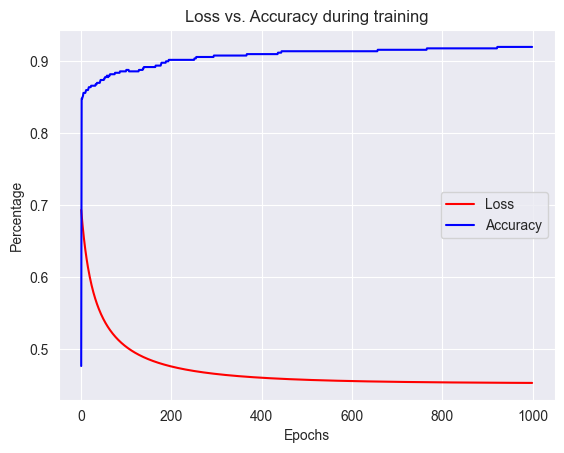

Accuracy: 0.914


In [643]:
def feature_engineer(dataframe):
    """
    Inserts product value of x0, x1 in new feature column

    :param dataframe: a dataframe with the format of mission2.csv
    :return: a dataframe with new feature
    """
    df_temp = dataframe.copy()
    df_temp['prod'] = df_temp['x0'] * df_temp['x1']
    return df_temp

# Reload the data
df = feature_engineer(data)
train = df[df['split'] == 'train']
test = df[df['split'] == 'test']

train = train.copy().drop(columns=['split'])
test = test.copy().drop(columns=['split'])

X_train = train[['prod']].to_numpy()
y_train = train['y'].to_numpy()

X_test = test[['prod']].to_numpy()
y_test = test['y'].to_numpy()

# Reset the logistic regression object.
lgr.reset(learning_rate=0.1, epochs=1000)

# Retrain
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

# Re-plot the loss-accuracy plot
plt.plot([i for i in range(lgr.epochs)], lgr.losses, c='red', label="Loss")
plt.plot([i for i in range(lgr.epochs)], lgr.train_accuracies, c='blue', label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Percentage")
plt.title("Loss vs. Accuracy during training")
plt.legend()
plt.show()

print(f"Accuracy: {lgr.accuracy(y_test, y_pred)}")

The new accuracy is 0.914 and thus satisfies the condition of at least 0.88 in accuracy.

### 3. Discussions

**a)**
Logistic regression assumes that there is a linear relationship between the input features and the log-odds of the outcome (0 or 1). When the true relationship between the features (x0, x1) and the target variable is non-linear or involves more complex interactions, a simple linear model will have difficulty representing those patterns effectively. This seems to be the case with the first model.

To improve the model, I simply added new column called 'prod', which takes the product of x0 and x1. When multiplying these numbers together, the model now saw a better relation between the x0 and x1, and thus provided a better accuracy.

**b)**
The model’s inductive bias is the assumption it makes when generalizing from training data to new data. In this case, the model assumes that the relationship between the features and the target is linear, which explains why its predictions were poor at the beginning.

**c)**



In [644]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(train[['x0', 'x1']], y_train)
y_pred_dt = dt.predict(test[['x0', 'x1']])


print("DecisionTree accuracy:", lgr.accuracy(y_test, y_pred_dt))


DecisionTree accuracy: 0.93


Yes, the DecisionTreeClassifier can solve the problem, and it doesn't even need feature engineering to do so. This is because decision trees are able to capture non-linear relationships and complex interactions between features by recursively splitting the feature space into regions that best separate the target class. With this model I got a higher accuracy than I did with the logistic regression model (with feature engineering).

**d)**

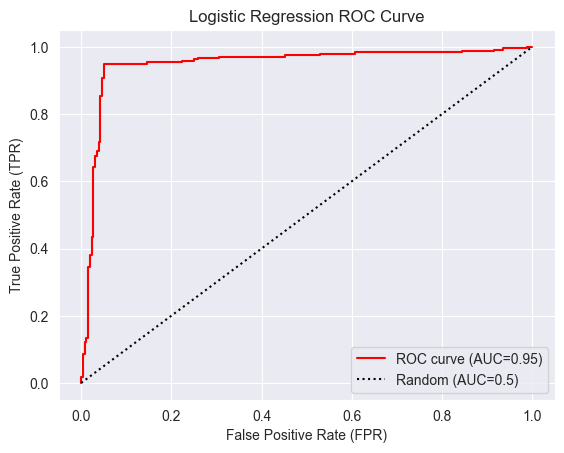

In [645]:
prob_predictions = lgr.predict_proba(X_test)

# Beregne ROC-curven og AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_predictions, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, prob_predictions),2)

plt.plot(fpr, tpr, label=f"ROC curve (AUC={auc})", c="red")
plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc='lower right')
plt.show()

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

# Mission 3

### 1. Accuracy

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\jensc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jensc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jensc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\jensc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.p

Best Parameters: {'max_depth': 5, 'min_impurity_decrease': 0.0001}
Test ROC AUC with Decision Tree: 0.725


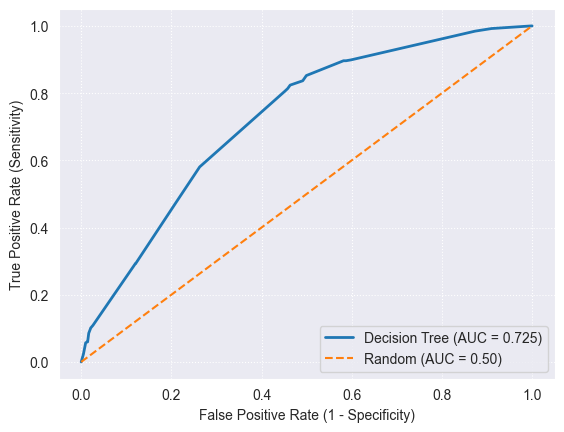

In [646]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

X_train = train.drop(columns=['target'])
y_train = train['target']

X_test = test.drop(columns=['target'])
y_test = test['target']

def binary_transform(x):
    """
    Transform float values into 0/1 depending on even/odd integer part.
    """
    out = []
    for val in x:

        val = round(val * 10**3)
        out.append(val % 2)

    return np.array(out)

# Adding a binary data column
X_train['binary_data'] = binary_transform(X_train['data_stream_3'])
X_test['binary_data'] = binary_transform(X_test['data_stream_3'])

# Finding the best parameters
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_impurity_decrease': [None, 0.0001, 0.001, 0.01],
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
# # Best Parameters: {'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 2, 'min_samples_split': 10}


# Train classifier
dt = DecisionTreeClassifier(max_depth= 5, max_features= None, min_impurity_decrease= 0.0001, random_state=42)
dt.fit(X_train, y_train)
y_prob = dt.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, y_prob)
print(f"Test ROC AUC with Decision Tree: {auc:.3f}")

# Plot ROC curves
fpr_tree, tpr_tree, _ = metrics.roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr_tree, tpr_tree, lw=2, label=f"Decision Tree (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random (AUC = 0.50)")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(loc="lower right")
plt.grid(True, linestyle=":")
plt.show()

### 2. Discussion

**a)**
I applied GridSearchCV to search over different values of max_depth and min_impurity_decrease in order to control the tree’s complexity and avoid overfitting. The best parameters were max_depth=5 and min_impurity_decrease=0.0001, and these were used to train the final model.

**b)**
ROC AUC is a metric that evaluates how well a model separates the two classes across all thresholds. It considers the trade-off between the true positive rate (TPR) and the false positive rate (FPR), making it more informative than accuracy, especially with imbalanced data. In the plot, the curve stays above the diagonal baseline with an AUC above 0.5, showing the model performs better than random guessing.

**c)**

Test ROC AUC with Random Forest: 0.735


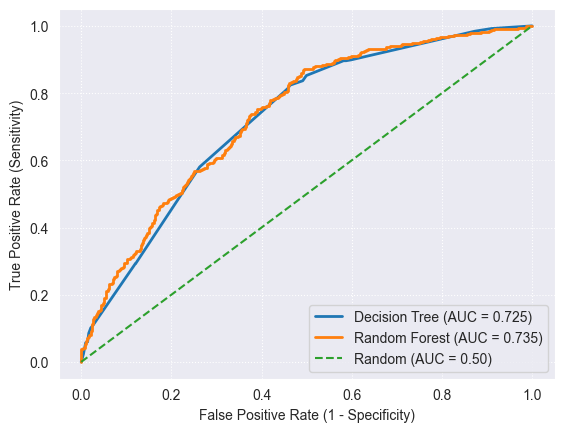

In [647]:
# Random Forest comparison
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_prob = rf.predict_proba(X_test)[:, 1]
auc_rf = metrics.roc_auc_score(y_test, y_prob)
print(f"Test ROC AUC with Random Forest: {auc_rf:.3f}")

# Plot ROC curves
fpr_rf,   tpr_rf,   _ = metrics.roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr_tree, tpr_tree, lw=2, label=f"Decision Tree (AUC = {auc:.3f})")
plt.plot(fpr_rf,   tpr_rf,   lw=2, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random (AUC = 0.50)")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(loc="lower right")
plt.grid(True, linestyle=":")
plt.show()

The results form the random forest classifier is almost the same as the decision tree classifier.

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [648]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

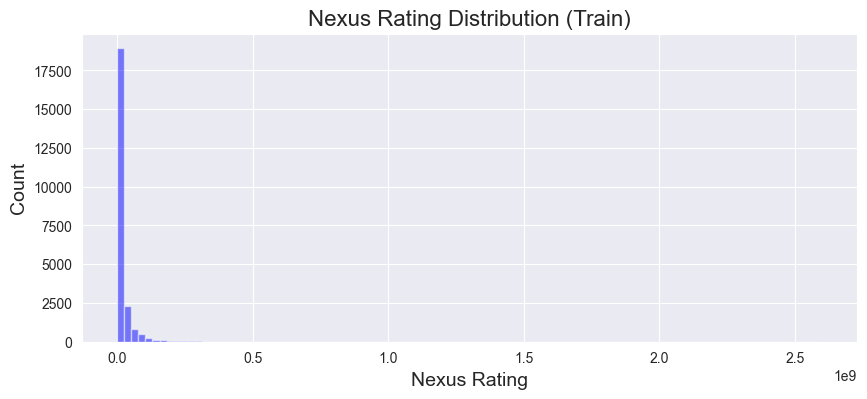

In [649]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distribution')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

Text(0, 0.5, 'Count')

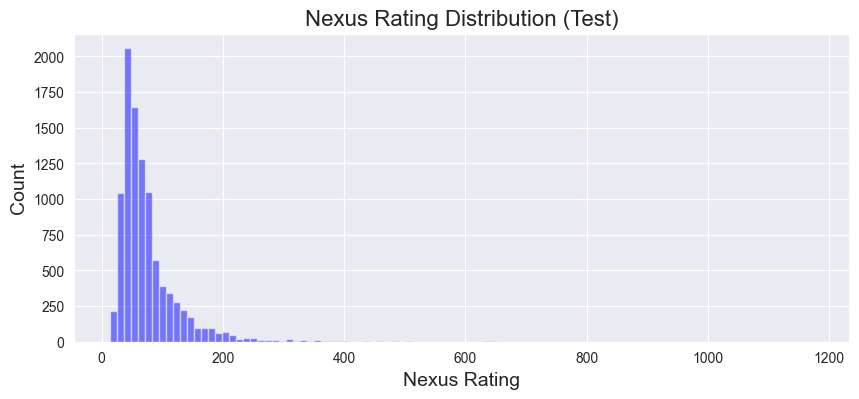

In [650]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
test['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distribution')
ax.set_title('Nexus Rating Distribution (Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
0,NaN,34000000.0,71.4,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0
1,NaN,8700000.0,54.0,4.0,50.0,4.0,1.0,NaN,3.00,NaN,NaN,1.0,0.0,NaN,NaN,3.0,1.0
2,3.0,6177920.0,39.4,19.6,11.2,10.0,1.0,NaN,2.65,1.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0
3,NaN,8900000.0,60.9,NaN,NaN,5.0,2.0,1.0,NaN,1.0,0.0,0.0,1.0,NaN,NaN,0.0,1.0
4,NaN,5550000.0,34.0,9.0,17.0,14.0,1.0,NaN,2.75,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,3.0,30038704.0,106.0,19.9,56.7,16.0,3.0,NaN,3.30,NaN,NaN,NaN,NaN,0.0,1.0,NaN,1.0
9933,NaN,19680000.0,82.0,NaN,NaN,3.0,3.0,NaN,NaN,2.0,0.0,1.0,0.0,NaN,NaN,1.0,2.0
9934,NaN,9095850.0,49.3,NaN,NaN,15.0,1.0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9935,NaN,11588500.0,38.8,10.5,15.1,14.0,1.0,NaN,3.30,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0


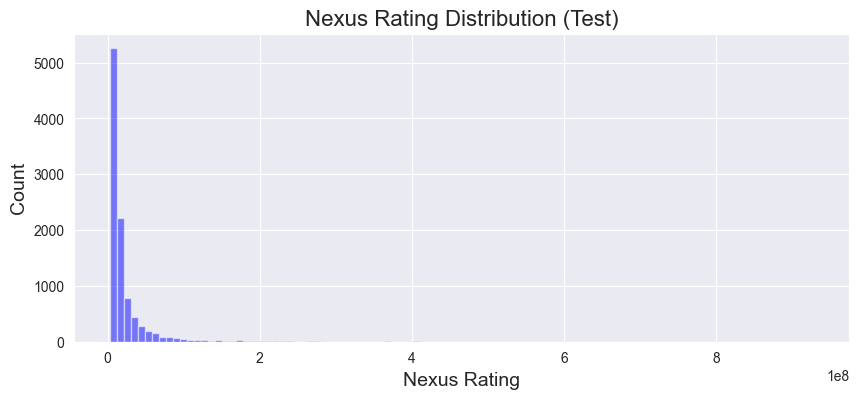

In [651]:
# Fix tampered test set by rotating columns (except ownership_type)
feature_cols = [c for c in test.columns if c != "ownership_type"]

# Extract values and rotate one step to the right
vals = test[feature_cols].to_numpy()
vals = np.hstack([vals[:, -1:], vals[:, :-1]])

test[feature_cols] = vals

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
test['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distribution')
ax.set_title('Nexus Rating Distribution (Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

test

Now the test data have been shifted to the right columns, all that is remaining is to clean the data.

In [652]:
def clean_data(df, max_missing=5):
    """
    Clean a dataframe:
    Drop rows with more than `max_missing` NaNs.
    If a column has any zeros, replace NaNs with 0.
    Otherwise, replace NaNs with column median
    """
    # Drop rows with too many missing values
    df_clean = df[df.isnull().sum(axis=1) <= max_missing].copy()

    # Fill NaNs column by column
    for col in df_clean.columns:
        if (df_clean[col] == 0).any():
            df_clean[col].fillna(0, inplace=True)
        else:
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)

    return df_clean


train = clean_data(train)
test = clean_data(test)

In [653]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Final Mission
### 1. Performance

In [654]:
X_train = train.copy().drop(columns=["nexus_rating"])
y_train = train.copy()["nexus_rating"]

X_test = test.copy().drop(columns=["nexus_rating"])
y_test = test.copy()["nexus_rating"]

cat = CatBoostRegressor(
    iterations=300,
    learning_rate=0.01,
    depth=9,
    verbose=0,
)

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
)

ada = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=300,
    learning_rate=0.01,
    random_state=42
)

# Stacking ensemble
stack = StackingRegressor(
    estimators=[('cat', cat), ('rf', rf), ('ada', ada)],
    cv=5,
    n_jobs=-1,
    passthrough=True
)


y_train_log = np.log1p(y_train)
stack.fit(X_train, y_train_log)
y_pred_log = stack.predict(X_test)
y_pred = np.expm1(y_pred_log)

score = rmsle(y_test, y_pred)
print(f"Test RMSLE: {score:.4f}")

Test RMSLE: 0.2821


### 2. Discussion

**a)**
The threshold-breaking strategy involved first shifting and cleaning the test data to correct for tampering and missing values, and then applying stacking ensembling with different model combinations. In the end, combining CatBoost, RandomForest, and AdaBoost in that order produced the best results and managed to bring the RMSLE below the 0.294 threshold.

**b)**
RMSLE was used because the target variable is positive and skewed, and the metric evaluates errors in relative terms rather than absolute size. This makes it more appropriate than RMSE when large values could dominate the error. The loss function used inside the stacking ensemble are the default loss functions for each model.

**c)**

C:\Users\jensc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


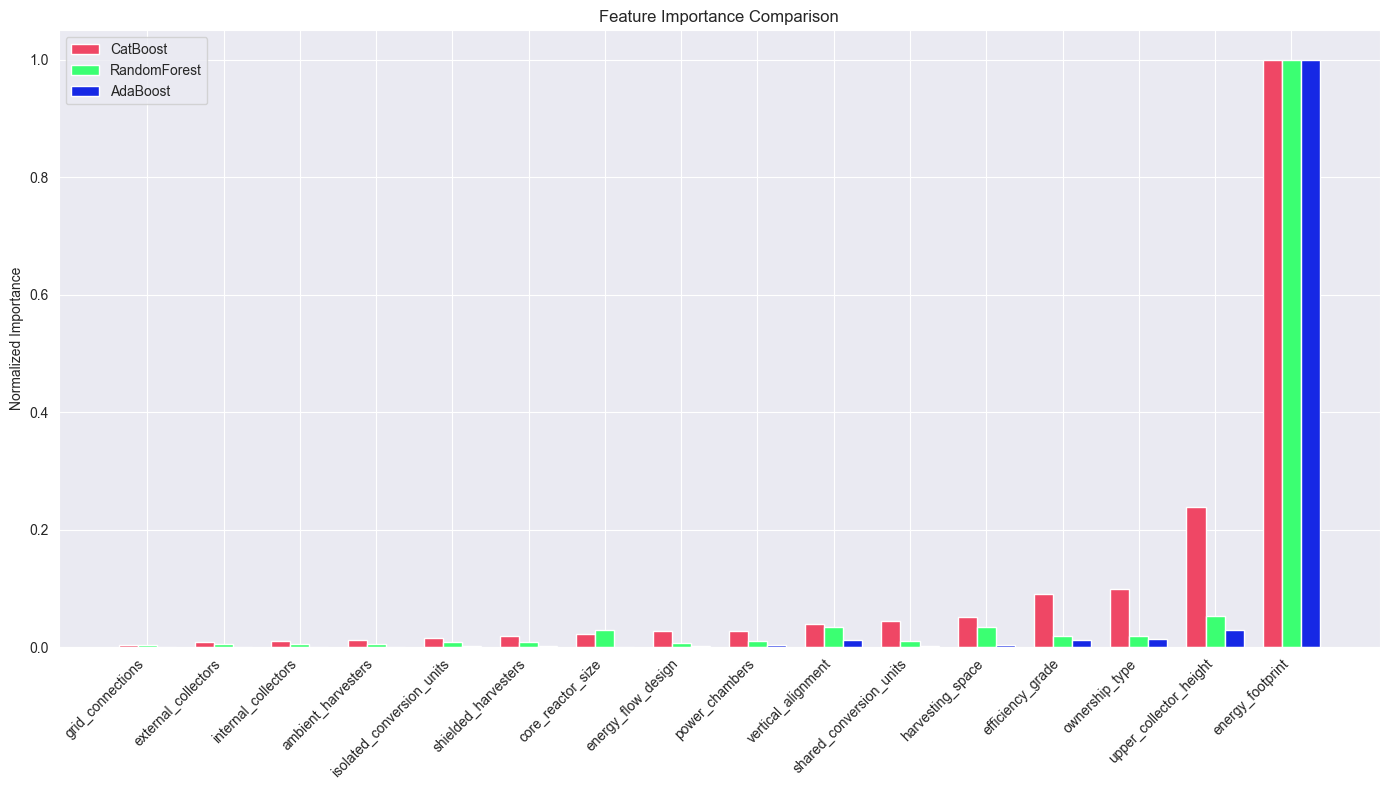

In [655]:
for model in [cat, rf, ada]:
    model.fit(X_train, y_train_log)

# Extract feature importances
cat_imp = cat.get_feature_importance()
rf_imp = rf.feature_importances_
ada_imp = np.mean([est.feature_importances_ for est in ada.estimators_], axis=0)

# Prepare data
feature_names = np.array(X_train.columns)
indices = np.argsort(cat_imp)  # sort features by CatBoost importance
features_sorted = feature_names[indices]

# Normalize
cat_imp = cat_imp / cat_imp.max()
rf_imp = rf_imp / rf_imp.max()
ada_imp = ada_imp / ada_imp.max()

importances = np.vstack([cat_imp, rf_imp, ada_imp])[:, indices]

# Plot grouped bar chart
x = np.arange(len(features_sorted))
bar_width = 0.25

plt.figure(figsize=(14, 8))
plt.bar(x - bar_width, importances[0], width=bar_width, label="CatBoost", color="#EF4765")
plt.bar(x, importances[1], width=bar_width, label="RandomForest", color="#3bff72")
plt.bar(x + bar_width, importances[2], width=bar_width, label="AdaBoost", color="#1628e5")
plt.xticks(x, features_sorted, rotation=45, ha="right")
plt.ylabel("Normalized Importance")
plt.title("Feature Importance Comparison")
plt.legend()
plt.tight_layout()
plt.show()

As the graph shows, every model used in the stacking ensemble identifies energy_footprint as the most important feature. In other words, CatBoost, RandomForest, and AdaBoost all consider energy_footprint the most relevant variable for predicting the nexus_rating.

**d)**
As mentioned in b), the ensembling technique I used for this task was a stacking ensemble with CatBoost, RandomForest Regressor, and AdaBoost. With this approach, I managed to achieve an RMSLE of 2.821.

**e)**
I would rely on cross-validation to estimate performance on unseen data. In addition, I would apply regularization and early stopping to reduce overfitting, and ensure the model is monitored and retrained as new data becomes available.